In [1]:
import pandas as pd
import mne as mne
import os 
import time
import numpy as np
import matplotlib.pyplot as plt
import joblib
import constants
from IPython.utils import io
import time
import sys
import yasa
from scipy.signal import welch
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupKFold

from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian

#Import my modules
import format_eeg_data
import constants
import eeg_stat_ts

#Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/antropy/fractal.py:197: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit((types.Array(types.float64, 1, "C", readonly=True), types.int32))
/user/home/ko20929/.conda/envs/sktime_latest/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package yasa is out of date. Your version is 0.6.3, the latest is 0.6.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


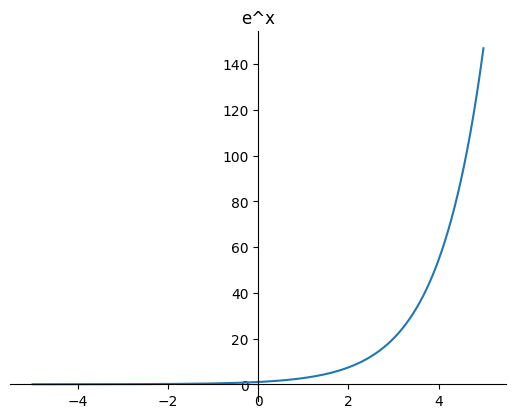

In [19]:
x = np.arange(-5,5, 0.01)
y = np.exp(x)

plt.plot(x,y)
plt.title('e^x')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Move bottom spine to zero position
plt.gca().spines['bottom'].set_position(('data', 0))

# Move left spine to zero position
plt.gca().spines['left'].set_position(('data', 0))

# Adjust ticks to appear on both sides of the spines
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

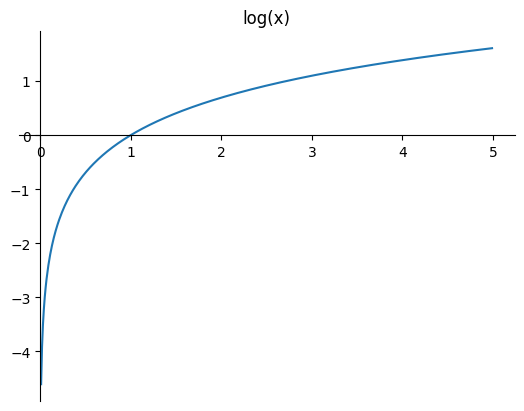

In [20]:
x = np.arange(0.01,5, 0.01)
y = np.log(x)

plt.title('log(x)')
plt.plot(x,y)

# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Move bottom spine to zero position
plt.gca().spines['bottom'].set_position(('data', 0))

# Move left spine to zero position
plt.gca().spines['left'].set_position(('data', 0))

# Adjust ticks to appear on both sides of the spines
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')

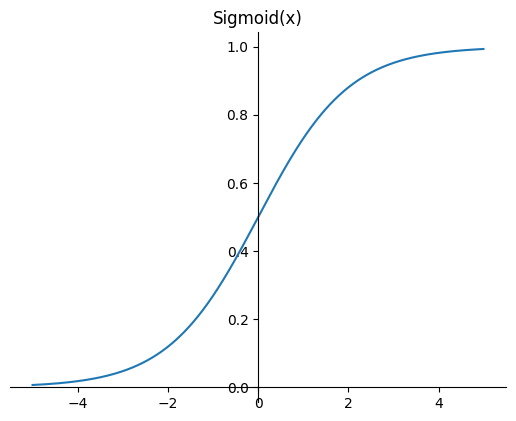

In [21]:
x = np.arange(-5,5, 0.01)
y = 1 / (1 + np.exp(-1*x) )

plt.plot(x,y)
plt.title('Sigmoid(x)')
# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Move bottom spine to zero position
plt.gca().spines['bottom'].set_position(('data', 0))

# Move left spine to zero position
plt.gca().spines['left'].set_position(('data', 0))

# Adjust ticks to appear on both sides of the spines
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')